## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib as plt
import tensorflow as tf


#  Import and read the charity_data.csv.
application_df = pd.read_csv('../Resources/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Check for null values
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [3]:
# Check for duplicated values
application_df.duplicated().sum()

0

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df['APPLICATION_TYPE'].value_counts()
app_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for i, v in app_count.items():
  if v < 528:
    application_types_to_replace.append(i)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = application_df['CLASSIFICATION'].value_counts()

for i, v in class_counts.items():
  if v > 1:
    print(i, v)

C1000 17326
C2000 6074
C1200 4837
C3000 1918
C2100 1883
C7000 777
C1700 287
C4000 194
C5000 116
C1270 114
C2700 104
C2800 95
C7100 75
C1300 58
C1280 50
C1230 36
C1400 34
C7200 32
C2300 32
C1240 30
C8000 20
C7120 18
C1500 16
C1800 15
C6000 15
C1250 14
C8200 11
C1238 10
C1278 10
C1235 9
C1237 9
C7210 7
C2400 6
C1720 6
C4100 6
C1257 5
C1600 5
C1260 3
C2710 3
C0 3
C3200 2
C1234 2
C1246 2
C1267 2
C1256 2


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []

for i, v in class_counts.items():
  if v < 1883:
    classifications_to_replace.append(i)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
application_df_dummies = application_df_dummies.astype(int)
application_df_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL']
X = application_df_dummies.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Use Keras Tuner to opitmize the parameters

In [14]:
# Change from Optimization V1: 
# (1) Added more neurons (up to 100 instead of 80) to hidden layer.
# (2) Added a few more hidden layers (8 instead of 5)

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    input_features = X_train_scaled.shape[1] 

    # Activation function choice
    activation = hp.Choice('activation',['relu','tanh'])

    # Set a new instance of the optimizer
    nn.optimizer = tf.keras.optimizers.Adam()  

    # Input layer
    nn.add(tf.keras.Input(shape=(input_features,)))

    # First dense layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units', min_value=1, max_value=100, step=5), activation=activation))

    # Additional hidden layers
    for i in range(hp.Int('num_layers', 1, 8)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=1, max_value=50, step=5), activation=activation))
    
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn

In [15]:
# Change from Opitimzation V1:
# (3) The number of epochs refers to how many times the learning algorithm will work through the entire training dataset. It is a crucial hyperparameter that can significantly affect the performance and behavior of a machine learning model. Here’s how the number of epochs impacts the model:
# Low Number of Epochs: Can lead to underfitting and high bias.
# High Number of Epochs: Can result in overfitting and high variance.
# Choosing the right number of epochs is a balancing act, and it's often beneficial to experiment with different values to find the one that yields the best model performance on your specific dataset.

# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=60,
    hyperband_iterations=2,
    directory="my_new_tuning_directory",  # New directory for storing tuner state
    project_name="experiment_3"  # Custom project name
    )

Reloading Tuner from my_new_tuning_directory/experiment_3/tuner0.json


In [ ]:
# Change from Opitimzation V1:
# (3) The number of epochs refers to how many times the learning algorithm will work through the entire training dataset. It is a crucial hyperparameter that can significantly affect the performance and behavior of a machine learning model. Here’s how the number of epochs impacts the model:
# Low Number of Epochs: Can lead to underfitting and high bias.
# High Number of Epochs: Can result in overfitting and high variance.
# Choosing the right number of epochs is a balancing act, and it's often beneficial to experiment with different values to find the one that yields the best model performance on your specific dataset.
# (4) Batch Size: If you do not specify the batch_size parameter, it will automatically use 32. 
# This means that your training data will be divided into batches of 32 samples each during training.
# The choice of batch size can significantly affect the performance and convergence of your model. 
# Smaller batch sizes might lead to more noisy updates, while larger batch sizes might provide a more stable estimate of the gradient, 
# but they may require more memory.
# (5) Early Stopping: Implemented as a callback during the tuning process to stop training when the validation loss does not improve. This is useful if the number of epochs is high.


from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=60,validation_data=(X_test_scaled,y_test),
             batch_size=50, # batch size is default 32.
             callbacks=[early_stopping])  # Include early stopping)

In [17]:
# Evaluate the top 3 models against the test dataset
top_models = tuner.get_best_models(3)
for model in top_models:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


268/268 - 0s - 686us/step - accuracy: 0.7343 - loss: 0.5538
Loss: 0.553773820400238, Accuracy: 0.7343440055847168
268/268 - 0s - 687us/step - accuracy: 0.7329 - loss: 0.5755
Loss: 0.5755188465118408, Accuracy: 0.7329446077346802
268/268 - 0s - 615us/step - accuracy: 0.7329 - loss: 0.5548
Loss: 0.5548121333122253, Accuracy: 0.7329446077346802


In [18]:
# Top model hyperparameters
top_model_hyper = tuner.get_best_hyperparameters(1)[0]
top_model_hyper.values

{'activation': 'relu',
 'first_units': 36,
 'num_layers': 3,
 'units_0': 31,
 'units_1': 31,
 'units_2': 26,
 'units_3': 41,
 'units_4': 6,
 'units_5': 16,
 'units_6': 21,
 'units_7': 36,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [19]:
# Export our model to HDF5 (or keras) file
top_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = top_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
top_model.save("../Models_keras_files/AlphabetSoupCharity_Optimized_V3.h5")
top_model.save("../Models_keras_files/AlphabetSoupCharity_Optimized_V3.keras")

268/268 - 0s - 608us/step - accuracy: 0.7343 - loss: 0.5538


Loss: 0.553773820400238, Accuracy: 0.7343440055847168


## Build a model using the parameters from the best Keras Tuner model


In [20]:
input_dim = len(X_train_scaled[0]) # This calculates the length of the first row of X_train_scaled, which gives the number of features. It's functionally correct, but slightly less direct because it depends on accessing the first row.
input_features = X_train_scaled.shape[1] # This accesses the second dimension (columns) of the array directly. It's more concise and easier to understand.

best_nn = tf.keras.models.Sequential() # initializing an empty Sequential model

# Input layer
#best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['first_units'], input_dim=input_dim, activation=top_model_hyper.values['activation']))
best_nn.add(tf.keras.Input(shape=(input_features,))) # Recommended approach - Define input layer separately
best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['first_units'], activation=top_model_hyper.values['activation']))

# Loop through to create the hidden layers
for i in range(top_model_hyper.values['num_layers']):
  best_nn.add(tf.keras.layers.Dense(units=top_model_hyper.values['units_'+ str(i)], activation=top_model_hyper.values['activation']))

# Output layer
best_nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the model structure
best_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 36)             │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 31)             │         1,147 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 31)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 26)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,582 (17.90 KB)

 Trainable params: 4,582 (17.90 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the best model
best_nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Change from Opitimzation V1:
# (4) Increased number of epochs here too

# Train the best model
fit_best_model = best_nn.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.6941 - loss: 0.6065
Epoch 2/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.7223 - loss: 0.5615
Epoch 3/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.7308 - loss: 0.5508
Epoch 4/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7331 - loss: 0.5502
Epoch 5/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.7328 - loss: 0.5468
Epoch 6/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7323 - loss: 0.5456
Epoch 7/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7356 - loss: 0.5451
Epoch 8/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.7308 - loss: 0.5470
Epoch 9/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.7360 - loss: 0.5421
Epoch 10/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7368 - loss: 0.5408
Epoch 11/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7383 - loss: 0.5406
Epoch 12/150
804/80

In [23]:
# Evaluate the best model using the test data
model_loss, model_accuracy = best_nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 509us/step - accuracy: 0.7292 - loss: 0.5712
Loss: 0.5712304711341858, Accuracy: 0.7292128205299377


<Axes: >

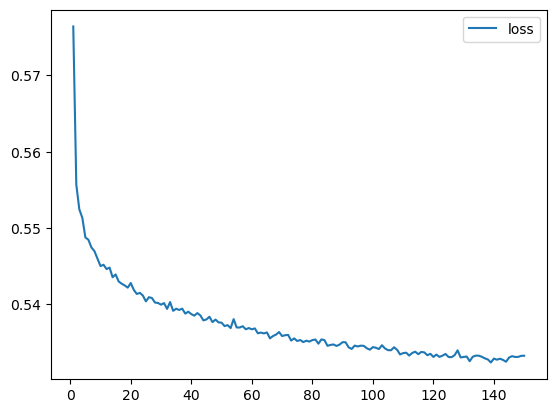

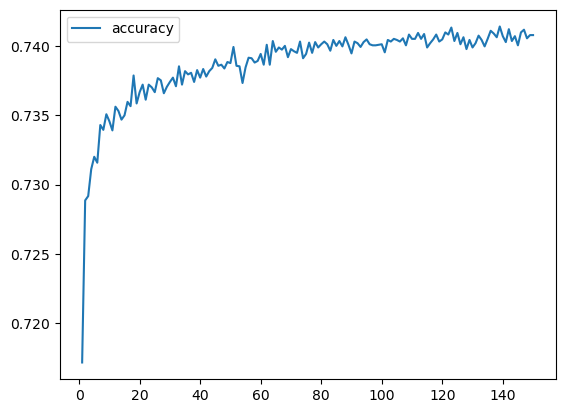

In [24]:
# Create a DataFrame containing training history of the model
history_df = pd.DataFrame(fit_best_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')